In [1]:
import pandas as pd
import seaborn as sns
sales = pd.read_csv("./input/sales.csv")

In [2]:
sales.head()

,Country,Items,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,UnitPrice,UnitCost,TotalRevenue,TotalCost,TotalProfit
0,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [3]:
from sklearn.tree import DecisionTreeRegressor
sales = sales.dropna()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [6]:
sales_train, sales_test = train_test_split(sales, test_size=0.3, random_state=42)
print(sales_train.shape, sales_test.shape)

(35000, 13) (15000, 13)


In [7]:
features= ['TotalCost']
dt_regression = DecisionTreeRegressor(max_depth = 1) # Increase max_depth to see effect in the plot
dt_regression.fit(sales_train[features], sales_train['TotalRevenue'])

DecisionTreeRegressor(max_depth=1)

In [8]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

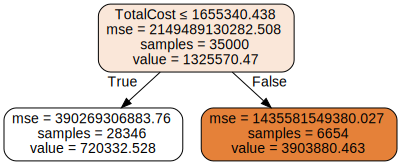

In [9]:
plot_tree_regression(dt_regression, features)

In [10]:
predictionsOnTrainset = dt_regression.predict(sales_train[features])
predictionsOnTestset = dt_regression.predict(sales_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, sales_train.TotalProfit)
rmseTest = calculate_rmse(predictionsOnTestset, sales_test.TotalProfit)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 1398665.644669623
RMSE on test set 1382637.1795785346


De accuratie voldoet aan mijn verwachtingen. Ik had wel verwacht dat hij misschien iets beter zou worden naarmate ik de boom dieper zou makne maar dit is niet het geval.

De tree werkt als volgt in de eerste stap kijkt hij of het gewicht groter of gelijk is aan 43 als dit waar is zet hij hem naar links als dit niet zo is zet hij hem naar rechts. Dit blijft hij eigenlijk netzo lang doen tot hij niet meer verder kan of de gezette diepte heeft bereikt. De mse die je ziet staan is het gemiddelde gekwadrateerde verschil tussen de geschatte waarden en de werkelijke waarde en je ziet dat deze verder afneemt naar mate je dieper de boom in gaat.